In [1]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, hamming_loss, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd

# Load the files into pandas DataFrames
file_paths = [
    "/kaggle/input/banglafakenews/Authentic-48K.csv",
    "/kaggle/input/banglafakenews/Fake-1K.csv",
    "/kaggle/input/banglafakenews/LabeledAuthentic-7K.csv",
    "/kaggle/input/banglafakenews/LabeledFake-1K.csv"
]


dataframes = {file_path: pd.read_csv(file_path) for file_path in file_paths}
first_rows = {file_path: df.head() for file_path, df in dataframes.items()}
first_rows


{'/kaggle/input/banglafakenews/Authentic-48K.csv':    articleID          domain                 date   category  \
 0          1  jagonews24.com  2018-09-19 17:48:18  Education   
 1          2  jagonews24.com  2018-09-19 17:48:19   National   
 2          3  jagonews24.com  2018-09-19 17:48:20   National   
 3          4  jagonews24.com  2018-09-19 17:48:21      Crime   
 4          5  jagonews24.com  2018-09-19 17:48:21   National   
 
                                             headline  \
 0   হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ   
 1    মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ   
 2  প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...   
 3  মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...   
 4         টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু   
 
                                              content  label  
 0  গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...      1  
 1  বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...      1  
 2  নরসিংদীর মনোহরদীতে প্

# With 0.05 feature extraction significance level.


# Logistic Regression with 0.05 feature extraction

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

authentic_df = pd.concat([dataframes["/kaggle/input/banglafakenews/Authentic-48K.csv"], dataframes["/kaggle/input/banglafakenews/LabeledAuthentic-7K.csv"]])
fake_df = pd.concat([dataframes["/kaggle/input/banglafakenews/Fake-1K.csv"], dataframes["/kaggle/input/banglafakenews/LabeledFake-1K.csv"]])

authentic_df['label'] = 1
fake_df['label'] = 0

combined_df = pd.concat([authentic_df, fake_df])

X = combined_df['content'].fillna("") 
y = combined_df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.05)  # Applying the 0.05 feature extraction threshold
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_tfidf, y_train)

predictions = log_reg_model.predict(X_test_tfidf)
evaluation_report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

In [4]:
predictions = log_reg_model.predict(X_test_tfidf)
# Basic metrics
#print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))
print("Hamming Loss:", hamming_loss(y_test, predictions))


tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sen = tp / (tp + fn)  # Sensitivity
spe = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print("Sensitivity (SEN):", sen)
print("Specificity (SPE):", spe)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)

Accuracy: 0.9699042407660738
Precision: 0.9724602203182374
Recall: 0.9966845878136201
Matthews Correlation Coefficient: 0.5823053755300048
Hamming Loss: 0.030095759233926128
Sensitivity (SEN): 0.9966845878136201
Specificity (SPE): 0.4123134328358209
Positive Predictive Value (PPV): 0.9724602203182374
Negative Predictive Value (NPV): 0.8565891472868217


# Random Forest Classifier with 0.05 feature extraction

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [6]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, hamming_loss

rf_predictions = rf_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))
print("Hamming Loss:", hamming_loss(y_test, predictions))


tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sen = tp / (tp + fn)  # Sensitivity
spe = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print("Sensitivity (SEN):", sen)
print("Specificity (SPE):", spe)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)

Accuracy: 0.9699042407660738
Precision: 0.9724602203182374
Recall: 0.9966845878136201
Matthews Correlation Coefficient: 0.5823053755300048
Hamming Loss: 0.030095759233926128
Sensitivity (SEN): 0.9966845878136201
Specificity (SPE): 0.4123134328358209
Positive Predictive Value (PPV): 0.9724602203182374
Negative Predictive Value (NPV): 0.8565891472868217


In [7]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)


SVC(random_state=42)

In [8]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, hamming_loss

svm_predictions = svm_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))
print("Hamming Loss:", hamming_loss(y_test, predictions))


tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sen = tp / (tp + fn)  # Sensitivity
spe = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print("Sensitivity (SEN):", sen)
print("Specificity (SPE):", spe)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)

Accuracy: 0.9699042407660738
Precision: 0.9724602203182374
Recall: 0.9966845878136201
Matthews Correlation Coefficient: 0.5823053755300048
Hamming Loss: 0.030095759233926128
Sensitivity (SEN): 0.9966845878136201
Specificity (SPE): 0.4123134328358209
Positive Predictive Value (PPV): 0.9724602203182374
Negative Predictive Value (NPV): 0.8565891472868217


In [9]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [10]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, hamming_loss

xgb_predictions = xgb_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))
print("Hamming Loss:", hamming_loss(y_test, predictions))


tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sen = tp / (tp + fn)  # Sensitivity
spe = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print("Sensitivity (SEN):", sen)
print("Specificity (SPE):", spe)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)

Accuracy: 0.9699042407660738
Precision: 0.9724602203182374
Recall: 0.9966845878136201
Matthews Correlation Coefficient: 0.5823053755300048
Hamming Loss: 0.030095759233926128
Sensitivity (SEN): 0.9966845878136201
Specificity (SPE): 0.4123134328358209
Positive Predictive Value (PPV): 0.9724602203182374
Negative Predictive Value (NPV): 0.8565891472868217


In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, hamming_loss

dt_predictions = dt_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))
print("Hamming Loss:", hamming_loss(y_test, predictions))


tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sen = tp / (tp + fn)  # Sensitivity
spe = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print("Sensitivity (SEN):", sen)
print("Specificity (SPE):", spe)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)

Accuracy: 0.9699042407660738
Precision: 0.9724602203182374
Recall: 0.9966845878136201
Matthews Correlation Coefficient: 0.5823053755300048
Hamming Loss: 0.030095759233926128
Sensitivity (SEN): 0.9966845878136201
Specificity (SPE): 0.4123134328358209
Positive Predictive Value (PPV): 0.9724602203182374
Negative Predictive Value (NPV): 0.8565891472868217


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_tfidf, y_train)


GradientBoostingClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, hamming_loss

gb_predictions = gb_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))
print("Hamming Loss:", hamming_loss(y_test, predictions))


tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sen = tp / (tp + fn)  # Sensitivity
spe = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print("Sensitivity (SEN):", sen)
print("Specificity (SPE):", spe)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)

Accuracy: 0.9699042407660738
Precision: 0.9724602203182374
Recall: 0.9966845878136201
Matthews Correlation Coefficient: 0.5823053755300048
Hamming Loss: 0.030095759233926128
Sensitivity (SEN): 0.9966845878136201
Specificity (SPE): 0.4123134328358209
Positive Predictive Value (PPV): 0.9724602203182374
Negative Predictive Value (NPV): 0.8565891472868217


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, hamming_loss

knn_predictions = knn_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))
print("Hamming Loss:", hamming_loss(y_test, predictions))


tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sen = tp / (tp + fn)  # Sensitivity
spe = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print("Sensitivity (SEN):", sen)
print("Specificity (SPE):", spe)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)

Accuracy: 0.9699042407660738
Precision: 0.9724602203182374
Recall: 0.9966845878136201
Matthews Correlation Coefficient: 0.5823053755300048
Hamming Loss: 0.030095759233926128
Sensitivity (SEN): 0.9966845878136201
Specificity (SPE): 0.4123134328358209
Positive Predictive Value (PPV): 0.9724602203182374
Negative Predictive Value (NPV): 0.8565891472868217


In [16]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train_tfidf, y_train)
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, hamming_loss

adaboost_predictions = adaboost_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))
print("Hamming Loss:", hamming_loss(y_test, predictions))


tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sen = tp / (tp + fn)  # Sensitivity
spe = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print("Sensitivity (SEN):", sen)
print("Specificity (SPE):", spe)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)

Accuracy: 0.9699042407660738
Precision: 0.9724602203182374
Recall: 0.9966845878136201
Matthews Correlation Coefficient: 0.5823053755300048
Hamming Loss: 0.030095759233926128
Sensitivity (SEN): 0.9966845878136201
Specificity (SPE): 0.4123134328358209
Positive Predictive Value (PPV): 0.9724602203182374
Negative Predictive Value (NPV): 0.8565891472868217


In [17]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_tfidf, y_train)
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, hamming_loss

sgd_predictions = sgd_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))
print("Hamming Loss:", hamming_loss(y_test, predictions))


tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sen = tp / (tp + fn)  # Sensitivity
spe = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print("Sensitivity (SEN):", sen)
print("Specificity (SPE):", spe)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)

Accuracy: 0.9699042407660738
Precision: 0.9724602203182374
Recall: 0.9966845878136201
Matthews Correlation Coefficient: 0.5823053755300048
Hamming Loss: 0.030095759233926128
Sensitivity (SEN): 0.9966845878136201
Specificity (SPE): 0.4123134328358209
Positive Predictive Value (PPV): 0.9724602203182374
Negative Predictive Value (NPV): 0.8565891472868217


In [18]:
from sklearn.svm import LinearSVC
linear_svc_model = LinearSVC(random_state=42)
linear_svc_model.fit(X_train_tfidf, y_train)
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, hamming_loss

linear_svc_predictions = linear_svc_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, predictions))
print("Hamming Loss:", hamming_loss(y_test, predictions))


tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sen = tp / (tp + fn)  # Sensitivity
spe = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print("Sensitivity (SEN):", sen)
print("Specificity (SPE):", spe)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)

Accuracy: 0.9699042407660738
Precision: 0.9724602203182374
Recall: 0.9966845878136201
Matthews Correlation Coefficient: 0.5823053755300048
Hamming Loss: 0.030095759233926128
Sensitivity (SEN): 0.9966845878136201
Specificity (SPE): 0.4123134328358209
Positive Predictive Value (PPV): 0.9724602203182374
Negative Predictive Value (NPV): 0.8565891472868217


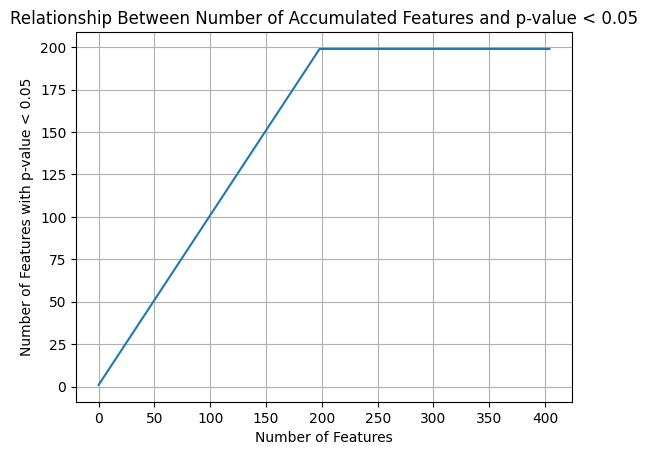

In [19]:
from sklearn.feature_selection import chi2
import numpy as np
chi2_values, p_values = chi2(X_train_tfidf, y_train)
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
accumulated_features = np.cumsum(sorted_p_values < 0.05)
import matplotlib.pyplot as plt
plt.plot(accumulated_features)
plt.xlabel('Number of Features')
plt.ylabel('Number of Features with p-value < 0.05')
plt.title('Relationship Between Number of Accumulated Features and p-value < 0.05')
plt.grid(True)
plt.show()


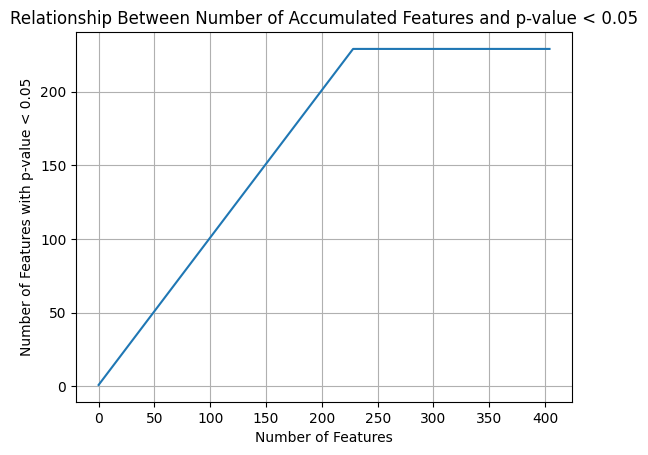

In [20]:
from sklearn.feature_selection import chi2
import numpy as np
chi2_values, p_values = chi2(X_train_tfidf, y_train)
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
accumulated_features = np.cumsum(sorted_p_values < 0.1)
import matplotlib.pyplot as plt
plt.plot(accumulated_features)
plt.xlabel('Number of Features')
plt.ylabel('Number of Features with p-value < 0.05')
plt.title('Relationship Between Number of Accumulated Features and p-value < 0.05')
plt.grid(True)
plt.show()
